In [64]:
import logging
import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

from IPython.display import Image
from IPython.core.display import HTML

In [65]:
logging.basicConfig(format='%(asctime)s %(levelname)s %(name)s %(message)s', level=logging.DEBUG)
mpl=logging.getLogger('matplotlib')
mpl.setLevel(logging.WARNING)

In [6]:
%load_ext autoreload
%autoreload 2

In [121]:
from dwd_forecast import DWD
from weather_plot import DwdForecastPlot

In [122]:
d=DWD()

In [123]:
sl=d.read_station_list()

2020-03-29 10:15:33,074 DEBUG DWD Read station list ./cache/station-list.json from cache


In [124]:
sl.head()

,Stationsname,Stations_ID,Kennung,Stations-kennung,Breite,Länge,Stations-höhe,Flussgebiet,Bundesland,Beginn,Ende,BeginnDT,EndeDT
0,Aach,1,KL,02783,47.8410,8.8490,478,NaN,BW,01.01.1937,30.06.1986,1937-01-01,1986-06-30
1,Aach,1,RR,70191,47.8410,8.8490,478,NaN,BW,01.01.1912,30.06.1986,1912-01-01,1986-06-30
2,Aach/Hegau,10771,PE,10771,47.8500,8.8500,480,NaN,BW,None,None,NaT,NaT
3,Aachen,3,EB,02205,50.7827,6.0941,202,803100.0,NW,01.01.1951,31.03.2011,1951-01-01,2011-03-31
4,Aachen,3,FF,02205,50.7827,6.0941,202,803100.0,NW,01.01.1937,31.03.2011,1937-01-01,2011-03-31


In [125]:
dwc=d.station_forecast('10865')

2020-03-29 10:15:33,483 DEBUG DWD Station forecast 10865 read from cache ./cache/station-forecast-10865.json


In [126]:
dwc.head()

,PPPP,E_PPP,TX,TTT,E_TTT,Td,E_Td,TN,TG,TM,...,RRad1,Rad1h,SunD1,SunD3,PEvap,WPc11,WPc31,WPc61,WPch1,WPcd1
2020-03-29 04:00:00,101760,20,NaN,278.65,0.5,272.95,0.5,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,1.0,NaN,NaN,NaN,NaN
2020-03-29 05:00:00,101810,30,NaN,278.45,0.7,273.05,0.6,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,3.0,NaN,NaN,NaN,NaN
2020-03-29 06:00:00,101830,40,285.45,278.55,0.6,272.95,0.8,278.15,276.15,282.75,...,NaN,NaN,600,0.0,NaN,3.0,2.0,3.0,NaN,NaN
2020-03-29 07:00:00,101840,40,NaN,278.95,0.5,272.95,0.9,NaN,NaN,NaN,...,NaN,NaN,960,1200.0,NaN,3.0,NaN,NaN,NaN,NaN
2020-03-29 08:00:00,101840,40,NaN,279.75,0.6,272.85,1.0,NaN,NaN,NaN,...,NaN,NaN,1200,2640.0,NaN,3.0,NaN,NaN,NaN,NaN


In [127]:
my_lat, my_lon=(48.15, 11.56)

In [128]:
nearest=d.get_closest(my_lat,my_lon)
print(nearest)

2020-03-29 10:15:35,776 DEBUG root Station 04124 fails
2020-03-29 10:15:35,860 DEBUG root Station 04124 fails
2020-03-29 10:15:35,932 DEBUG root Station 04124 fails


('10865', 'München-Stadt', Distance(1.9339969383980125))


In [129]:
# sns.set()
# matplotlib.rc_file_defaults()

In [130]:
wp=DwdForecastPlot()

2020-03-29 10:15:36,153 DEBUG DWD Station forecast 10865 read from cache ./cache/station-forecast-10865.json


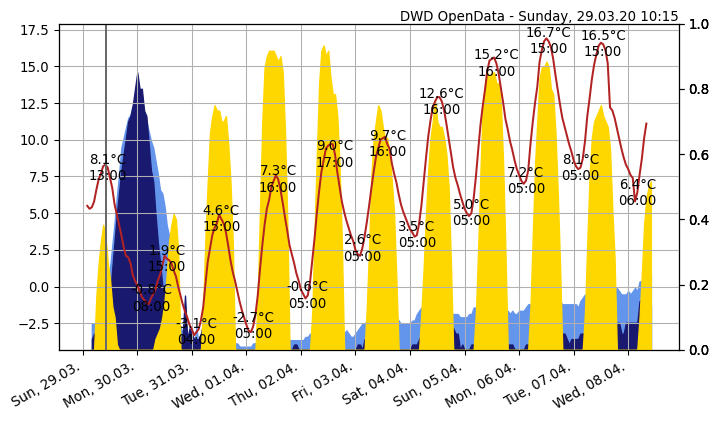

In [131]:
wp.plot("10865",image_file='weather.png')
Image('weather.png')

In [1]:
from ipyleaflet import Map, Marker, MarkerCluster, AwesomeIcon

In [2]:
icon_home = AwesomeIcon(
    name='home',
    marker_color='blue',
    icon_color='black',
    spin=False
)
icon_station = AwesomeIcon(
    name = 'thermometer-4',
    marker_color='blue',
    icon_color='black',
    spin=False
)


In [3]:
home=(my_lat,my_lon)
center=(min(sl['Breite'])+(max(sl['Breite'])-min(sl['Breite']))/2, min(sl['Länge'])+(max(sl['Länge'])-min(sl['Länge']))/2)
m=Map(center=center, zoom=8)

NameError: name 'my_lat' is not defined

In [ ]:
marker = Marker(location=home, icon=icon_home, draggable=False, title="DWD weather station")
m.add_layer(marker);

display(m)

In [ ]:
min(sl['Breite'])

In [ ]:
max(sl['Breite'])

In [ ]:
import pandas as pd

In [ ]:
stations=[]
for i in range(len(sl)):
    if d._is_uptodate(i) is True:
        stations.append((sl['Breite'][i], sl['Länge'][i], sl['Stationsname'][i], sl['Kennung'][i], sl['Stations-kennung'][i], sl['Ende'][i]))

In [ ]:
len(stations)

In [ ]:
len(sl)

In [ ]:
import time
import datetime

In [ ]:
stations[:10]

In [ ]:
dt=(datetime.datetime.now()-sl['EndeDT'][3]).total_seconds()

In [ ]:
from urllib.request import urlopen

In [ ]:
def get_forecast_stations():
    url='https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_L/single_stations'
    try:
        resp=urlopen(url)
        data=resp.read()
    except Exception as e:
        logging.error(f"Failed to download {url}: {e}")
        return None
    return data

In [ ]:
data=get_forecast_stations()

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(data, 'html.parser')
raw_stations = []
for a in soup.find_all('a', href=True): 
    if a.text: 
        raw_stations.append(a['href'][:-1])
raw_stations=raw_stations[1:]

In [ ]:
raw_stations[:10]

In [ ]:
len(raw_stations)

In [ ]:
val_stations=[]
for i in range(len(sl)):
    val_stations.append(sl['Stations-kennung'][i])

In [ ]:
len(val_stations), len(raw_stations)

In [ ]:
vir=[]
riv=[]
for i in range(len(val_stations)):
    if val_stations[i] in raw_stations:
        if val_stations[i] not in vir:
            vir.append(val_stations[i])
for i in range(len(raw_stations)):
    if raw_stations[i] in val_stations:
        riv.append(raw_stations[i])
vir=sorted(vir)
riv=sorted(riv)

In [ ]:
len(vir), len(riv)

In [ ]:
markers=[]
done=[]
for i in range(len(sl)):
    kenn=sl['Stations-kennung'][i]
    name=sl['Stationsname'][i]
    if (kenn in vir) and (name not in done):
        done.append(name)
        marker = Marker(location=(sl['Breite'][i], sl['Länge'][i]), icon=icon_station, draggable=False, title=f"{name}, id={kenn}")
        markers.append(marker)

In [ ]:
len(markers)

In [ ]:
marker_cluster = MarkerCluster(
    markers=markers
)

In [ ]:
m.add_layer(marker_cluster)

In [ ]:
m